In [8]:
import os
import re
import json
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot as plt

from melody import Melody
from utils import notes_to_midi, notes_and_chord_to_midi, get_chord_progressions

rcParams['figure.figsize'] = 20,10

In [4]:
import importlib
import objective_metrics


importlib.reload(objective_metrics)

<module 'objective_metrics' from '/media/manu/Data/PycharmProjects/thesis/src/objective_metrics.py'>

In [9]:
version = '0.9'
folder = f'../data/split_melody_data/v{version}'
filepaths = [y for x in os.walk(folder) for y in glob(os.path.join(x[0], '*.csv'))]

chord_progressions = get_chord_progressions()

In [36]:
metrics = {}

# filepath = '../data/split_melody/Real Book/All Of Me_original.csv'

all_dfs = []

for filepath in filepaths:
    song_name = os.path.basename(filepath).replace('.csv', '')
    song_name = "".join(song_name.split(' - ')[-1])
    song_name = re.sub('\(.*\)', '', song_name).strip()
    song_name = re.sub('_[0-9]', '', song_name)
    song_name = re.sub('_original', '', song_name)
    
    print(filepath) 

    original = 'Real Book' in filepath

    df = pd.read_csv(filepath, index_col=0)
    
    df['filename'] = filepath
    df['song'] = song_name
    df['original'] = original
    
    all_dfs.append(df)

    pe1 = objective_metrics.compute_piece_pitch_entropy(df, 1)
    pe4 = objective_metrics.compute_piece_pitch_entropy(df, 4)
    gs = objective_metrics.compute_piece_groove_similarity(df, max_pairs=np.inf)
    qo = objective_metrics.calculate_QO(df)
    qd = objective_metrics.calculate_QD(df)
    cpr2 = objective_metrics.calculate_CPR(df, 2)
    dpr12 = objective_metrics.calculate_DPR(df, 12)
    ts8 = objective_metrics.calculate_TS(df, 8)
    pv4 = objective_metrics.calculate_PV(df, 4)
    rv4 = objective_metrics.calculate_RV(df, 4)
    hc = objective_metrics.calculate_HC(df)
        
    metrics[filepath] = {
        'H1': pe1,
        'H4': pe4,
        'GS': gs,
        'QO': qo,
        'QD': qd,
        'CPR2': cpr2,
        'DPR12': dpr12,
        'TS8': ts8,
        'PV4': pv4,
        'RV4': rv4,
        'HC': hc,
        'source': os.path.basename(os.path.dirname(filepath)),
        'original': original
    }
    

total_df = pd.concat(all_dfs)  

../data/split_melody_data/v0.9/Doug McKenzie/Alone Together_1.csv
../data/split_melody_data/v0.9/Doug McKenzie/Autumn Leaves_1.csv
../data/split_melody_data/v0.9/Doug McKenzie/Autumn Leaves_2.csv
../data/split_melody_data/v0.9/Doug McKenzie/Autumn Leaves_3.csv
../data/split_melody_data/v0.9/Doug McKenzie/Autumn Leaves_4.csv
../data/split_melody_data/v0.9/Doug McKenzie/Autumn Leaves_5.csv
../data/split_melody_data/v0.9/Doug McKenzie/Autumn Leaves_6.csv
../data/split_melody_data/v0.9/Doug McKenzie/Autumn Leaves_7.csv
../data/split_melody_data/v0.9/Doug McKenzie/But Beautiful_1.csv
../data/split_melody_data/v0.9/Doug McKenzie/But Beautiful_2.csv
../data/split_melody_data/v0.9/Doug McKenzie/But Beautiful_3.csv
../data/split_melody_data/v0.9/Doug McKenzie/Come Rain Or Come Shine (1)_1.csv
../data/split_melody_data/v0.9/Doug McKenzie/Come Rain Or Come Shine (1)_2.csv
../data/split_melody_data/v0.9/Doug McKenzie/Come Rain Or Come Shine (2)_1.csv
../data/split_melody_data/v0.9/Doug McKenzie/Co

../data/split_melody_data/v0.9/Jazz-Midi/My Funny Valentine_1.csv
../data/split_melody_data/v0.9/Jazz-Midi/Nardis_1.csv
../data/split_melody_data/v0.9/Jazz-Midi/Nardis_2.csv
../data/split_melody_data/v0.9/Jazz-Midi/Nardis_3.csv
../data/split_melody_data/v0.9/Jazz-Midi/Nardis_4.csv
../data/split_melody_data/v0.9/Jazz-Midi/Nardis_5.csv
../data/split_melody_data/v0.9/Jazz-Midi/Nardis_6.csv
../data/split_melody_data/v0.9/Jazz-Midi/Night And Day_1.csv
../data/split_melody_data/v0.9/Jazz-Midi/Our Love Is Here To Stay_1.csv
../data/split_melody_data/v0.9/Jazz-Midi/People_1.csv
../data/split_melody_data/v0.9/Jazz-Midi/People_2.csv
../data/split_melody_data/v0.9/Jazz-Midi/Round Midnight_1.csv
../data/split_melody_data/v0.9/Jazz-Midi/Round Midnight_2.csv
../data/split_melody_data/v0.9/Jazz-Midi/Secret Love_1.csv
../data/split_melody_data/v0.9/Jazz-Midi/Secret Love_2.csv
../data/split_melody_data/v0.9/Jazz-Midi/Secret Love_3.csv
../data/split_melody_data/v0.9/Jazz-Midi/Secret Love_5.csv
../data/s

../data/split_melody_data/v0.9/JazzPage/It's All Right With Me (1)_1.csv
../data/split_melody_data/v0.9/JazzPage/It's All Right With Me (1)_2.csv
../data/split_melody_data/v0.9/JazzPage/It's All Right With Me (2)_1.csv
../data/split_melody_data/v0.9/JazzPage/Jordu_1.csv
../data/split_melody_data/v0.9/JazzPage/Just Friends_1.csv
../data/split_melody_data/v0.9/JazzPage/Lullaby Of Birdland (1)_1.csv
../data/split_melody_data/v0.9/JazzPage/Lullaby Of Birdland (2)_1.csv
../data/split_melody_data/v0.9/JazzPage/Lullaby Of Birdland (3)_1.csv
../data/split_melody_data/v0.9/JazzPage/Lulu's Back In Town_1.csv
../data/split_melody_data/v0.9/JazzPage/Lulu's Back In Town_2.csv
../data/split_melody_data/v0.9/JazzPage/Lulu's Back In Town_3.csv
../data/split_melody_data/v0.9/JazzPage/Lulu's Back In Town_4.csv
../data/split_melody_data/v0.9/JazzPage/Nardis (2)_1.csv
../data/split_melody_data/v0.9/MidKar/I Cover The Waterfront_3.csv
../data/split_melody_data/v0.9/MidKar/Ain't Misbehavin'_1.csv
../data/sp

../data/split_melody_data/v0.9/Real Book/I'll Be Seeing You_original.csv
../data/split_melody_data/v0.9/Real Book/Laura_original.csv
../data/split_melody_data/v0.9/Real Book/Moonglow_original.csv
../data/split_melody_data/v0.9/Real Book/People_original.csv
../data/split_melody_data/v0.9/Real Book/Solar_original.csv
../data/split_melody_data/v0.9/Real Book/Takin' A Chance On Love_original.csv
../data/split_melody_data/v0.9/Real Book/Fools Rush In_original.csv
../data/split_melody_data/v0.9/Real Book/Four On Six_original.csv
../data/split_melody_data/v0.9/Real Book/Four_original.csv
../data/split_melody_data/v0.9/Real Book/Gentle Rain_original.csv
../data/split_melody_data/v0.9/Real Book/Gettin' Sentimental Over You_original.csv
../data/split_melody_data/v0.9/Real Book/Giant Steps_original.csv
../data/split_melody_data/v0.9/Real Book/Girl Talk_original.csv
../data/split_melody_data/v0.9/Real Book/Good Bait_original.csv
../data/split_melody_data/v0.9/Real Book/Groovin' High_original.csv
.

../data/split_melody_data/v0.9/Real Book/You've Changed_original.csv
../data/split_melody_data/v0.9/Real Book/Young And Foolish_original.csv
../data/split_melody_data/v0.9/Weimar DB/Art Pepper - Anthropology_1.csv
../data/split_melody_data/v0.9/Weimar DB/Art Pepper - Anthropology_2.csv
../data/split_melody_data/v0.9/Weimar DB/Art Pepper - Anthropology_3.csv
../data/split_melody_data/v0.9/Weimar DB/Art Pepper - Anthropology_4.csv
../data/split_melody_data/v0.9/Weimar DB/Art Pepper - In A Mellow Tone_1.csv
../data/split_melody_data/v0.9/Weimar DB/Art Pepper - In A Mellow Tone_2.csv
../data/split_melody_data/v0.9/Weimar DB/Art Pepper - In A Mellow Tone_3.csv
../data/split_melody_data/v0.9/Weimar DB/Ben Webster - Bye Bye Blackbird_1.csv
../data/split_melody_data/v0.9/Weimar DB/Ben Webster - Night And Day_1.csv
../data/split_melody_data/v0.9/Weimar DB/Benny Carter - Just Friends_1.csv
../data/split_melody_data/v0.9/Weimar DB/Benny Carter - Just Friends_2.csv
../data/split_melody_data/v0.9/W

../data/split_melody_data/v0.9/Weimar DB/John Coltrane - Impressions (2)_9.csv
../data/split_melody_data/v0.9/Weimar DB/John Coltrane - Oleo_1.csv
../data/split_melody_data/v0.9/Weimar DB/John Coltrane - So What_1.csv
../data/split_melody_data/v0.9/Weimar DB/John Coltrane - So What_2.csv
../data/split_melody_data/v0.9/Weimar DB/Lee Konitz - I'll Remember April_1.csv
../data/split_melody_data/v0.9/Weimar DB/Lee Konitz - I'll Remember April_2.csv
../data/split_melody_data/v0.9/Weimar DB/Lee Konitz - Mean To Me_1.csv
../data/split_melody_data/v0.9/Weimar DB/Lee Konitz - Mean To Me_2.csv
../data/split_melody_data/v0.9/Weimar DB/Lionel Hampton - Memories Of You_1.csv
../data/split_melody_data/v0.9/Weimar DB/Louis Armstrong - Once In A While_1.csv
../data/split_melody_data/v0.9/Weimar DB/Miles Davis - Airegin_1.csv
../data/split_melody_data/v0.9/Weimar DB/Miles Davis - Airegin_2.csv
../data/split_melody_data/v0.9/Weimar DB/Miles Davis - Dolores_1.csv
../data/split_melody_data/v0.9/Weimar DB/

In [38]:
m = pd.DataFrame().from_dict(metrics).T
m

,H1,H4,GS,QO,QD,CPR2,DPR12,TS8,PV4,RV4,HC,source,original
../data/split_melody_data/v0.9/Doug McKenzie/Alone Together_1.csv,2.081601,3.020745,0.945428,0.897727,0.981061,0.056,0.04,0.121673,9.463415,9.97561,0.738621,Doug McKenzie,False
../data/split_melody_data/v0.9/Doug McKenzie/Autumn Leaves_1.csv,2.368826,3.026348,0.74937,0.508427,0.991573,0.020057,0.002865,0.329577,9.62069,8.827586,0.795864,Doug McKenzie,False
../data/split_melody_data/v0.9/Doug McKenzie/Autumn Leaves_2.csv,2.421461,3.021262,0.722992,0.526992,0.992288,0.018373,0.005249,0.347938,9.724138,10.758621,0.741201,Doug McKenzie,False
../data/split_melody_data/v0.9/Doug McKenzie/Autumn Leaves_3.csv,2.464039,3.11379,0.726941,0.665385,0.986538,0.007752,0.001938,0.441233,10.758621,13.827586,0.751909,Doug McKenzie,False
../data/split_melody_data/v0.9/Doug McKenzie/Autumn Leaves_4.csv,2.284321,2.975729,0.733703,0.558673,0.997449,0.028947,0.002632,0.419437,9.724138,11.275862,0.777195,Doug McKenzie,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
../data/split_melody_data/v0.9/Weimar DB/David Liebman - Softly As In A Morning Sunrise_2.csv,1.769466,2.665559,0.793431,0.683333,1.0,0.023256,0.023256,0.050279,8.428571,5.714286,0.559241,Weimar DB,False
../data/split_melody_data/v0.9/Weimar DB/David Liebman - Softly As In A Morning Sunrise_3.csv,1.678214,2.487164,0.81943,0.682635,0.994012,0.030864,0.012346,0.072289,7.241379,6.758621,0.508959,Weimar DB,False
../data/split_melody_data/v0.9/Weimar DB/David Liebman - Softly As In A Morning Sunrise_4.csv,1.700441,2.331667,0.809098,0.610465,0.988372,0.031646,0.018987,0.02924,7.551724,7.034483,0.686031,Weimar DB,False
../data/split_melody_data/v0.9/Weimar DB/David Liebman - Softly As In A Morning Sunrise_5.csv,1.506816,2.620575,0.853537,0.584615,0.961538,0.065574,0.04918,0.023256,7.551724,9.172414,0.648701,Weimar DB,False


In [39]:
pitch_classes = ['C','Db','D','Eb','E','F','F#','G', 'Ab', 'A', 'Bb', 'B']


total_df['pitch_class'] = (total_df['pitch'] % 12).apply([lambda x: pitch_classes[x]])

In [42]:
total_df['source'] = total_df['filename'].apply([lambda x: os.path.basename(os.path.dirname(x))])

In [61]:
g = sns.histplot(
    data=total_df, 
    x='offset', hue='source', kind='kde',
#     stat="density", common_norm=False
)
g.set_xticks(range(0,49))

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fbdea8d0310> (for post_execute):


KeyboardInterrupt: 

In [ ]:
g = sns.histplot(
    data=total_df[total_df['duration'] <= 48], 
    x='duration', hue='original', stat="density", common_norm=False)
g.set_xticks(range(1,49))

In [ ]:
g = sns.countplot(total_df.groupby('filename')['measure'].apply(max) + 1)
# g.set_xticks(range(0,129,4))

In [ ]:
print(
    total_df[total_df['original'] == True]['pitch'].min(),
    total_df[total_df['original'] == True]['pitch'].max()
)

In [ ]:
print(
    total_df[total_df['original'] == False]['pitch'].min(),
    total_df[total_df['original'] == False]['pitch'].max()
)

In [ ]:
g = sns.histplot(data=total_df[(total_df['pitch']<109) & (total_df['pitch']>=36)], 
                 x='pitch', 
                 hue='original',
                 stat="density", common_norm=False
                )
g.set_xticks(range(36,109))
g.set_xticklabels(pitch_classes * 6 + ['C'])

In [ ]:
g = sns.histplot(data=total_df, 
                  x='pitch_class', hue='original', 
                  stat="density", common_norm=False
 )

In [ ]:
total_df = total_df.merge(pd.DataFrame(total_df.groupby('filename').size()), how='left', left_on='filename', right_on='filename')
total_df = total_df.rename(columns={0: 'n_notes'})
print(
    total_df['n_notes'].min(),
    total_df['n_notes'].max(),
)

In [ ]:
sns.histplot(data=total_df, x='n_notes', hue='original')

In [ ]:
sns.countplot(total_df[total_df['original'] == False].groupby('song')['filename'].unique().apply(len))

In [ ]:
total_df['duration'].value_counts()

In [ ]:
import ast
import music21

context  = music21.key.Key('C')

total_df['chord_notes_triads'] = total_df['chord_notes'].apply([lambda x: str(ast.literal_eval(x)[1:4])])

In [ ]:
sns.countplot(data=total_df, x='chord_root', order=total_df['chord_root'].value_counts().index)

In [ ]:
chord_map = {}

for uc in total_df['chord_notes_triads'].unique():
    c = ast.literal_eval(uc)
    chord_map[uc] = music21.chord.Chord(c).simplifyEnharmonics(keyContext=context).pitchedCommonName
    

In [ ]:
total_df['chord_notes_triad_names'] = total_df['chord_notes_triads'].apply([lambda x: chord_map[x]])
total_df['chord_notes_triad_names'] = total_df['chord_notes_triad_names'].str.replace('triad', '').str.replace('-', ' ')

In [ ]:
sns.countplot(data=total_df, x='chord_notes_triad_names', order=total_df['chord_notes_triad_names'].value_counts().iloc[:20].index)

In [ ]:
folder = '../data/Complete Examples Melodies/Real Book'
filepaths = [y for x in os.walk(folder) for y in glob(os.path.join(x[0], '*.mid'))]

In [10]:
stats = {}

for filepath in filepaths:
    melody = Melody(filepath)
    melody.setup()
    
    stats[melody.filepath] = {
        'key': melody.key
    }
    

In [11]:
s = pd.DataFrame().from_dict(stats).T
s

,key
../data/split_melody_data/Doug McKenzie/Alone Together_1.csv,None
../data/split_melody_data/Doug McKenzie/Autumn Leaves_1.csv,None
../data/split_melody_data/Doug McKenzie/Autumn Leaves_2.csv,None
../data/split_melody_data/Doug McKenzie/Autumn Leaves_3.csv,None
../data/split_melody_data/Doug McKenzie/Autumn Leaves_4.csv,None
...,...
../data/split_melody_data/Weimar DB/David Liebman - Softly As In A Morning Sunrise_2.csv,None
../data/split_melody_data/Weimar DB/David Liebman - Softly As In A Morning Sunrise_3.csv,None
../data/split_melody_data/Weimar DB/David Liebman - Softly As In A Morning Sunrise_4.csv,None
../data/split_melody_data/Weimar DB/David Liebman - Softly As In A Morning Sunrise_5.csv,None


In [ ]:
s['key_root'] = s['key'].apply(lambda x: x.tonic)
s['key_mode'] = s['key'].apply(lambda x: x.mode)
s['key_name'] = s['key'].apply(lambda x: x.name.replace('-', 'b'))

In [ ]:
sns.countplot(s['key_name'], order=s['key_name'].value_counts().index)

In [ ]:
sns.histplot(data=m, x='H1', hue='original', element="step")

In [ ]:
m[m['H4'] == 0]

In [ ]:
sns.histplot(data=m, x='H4', hue='original', element="step")

In [ ]:
sns.histplot(data=m, x='GS', hue='original', element="step")

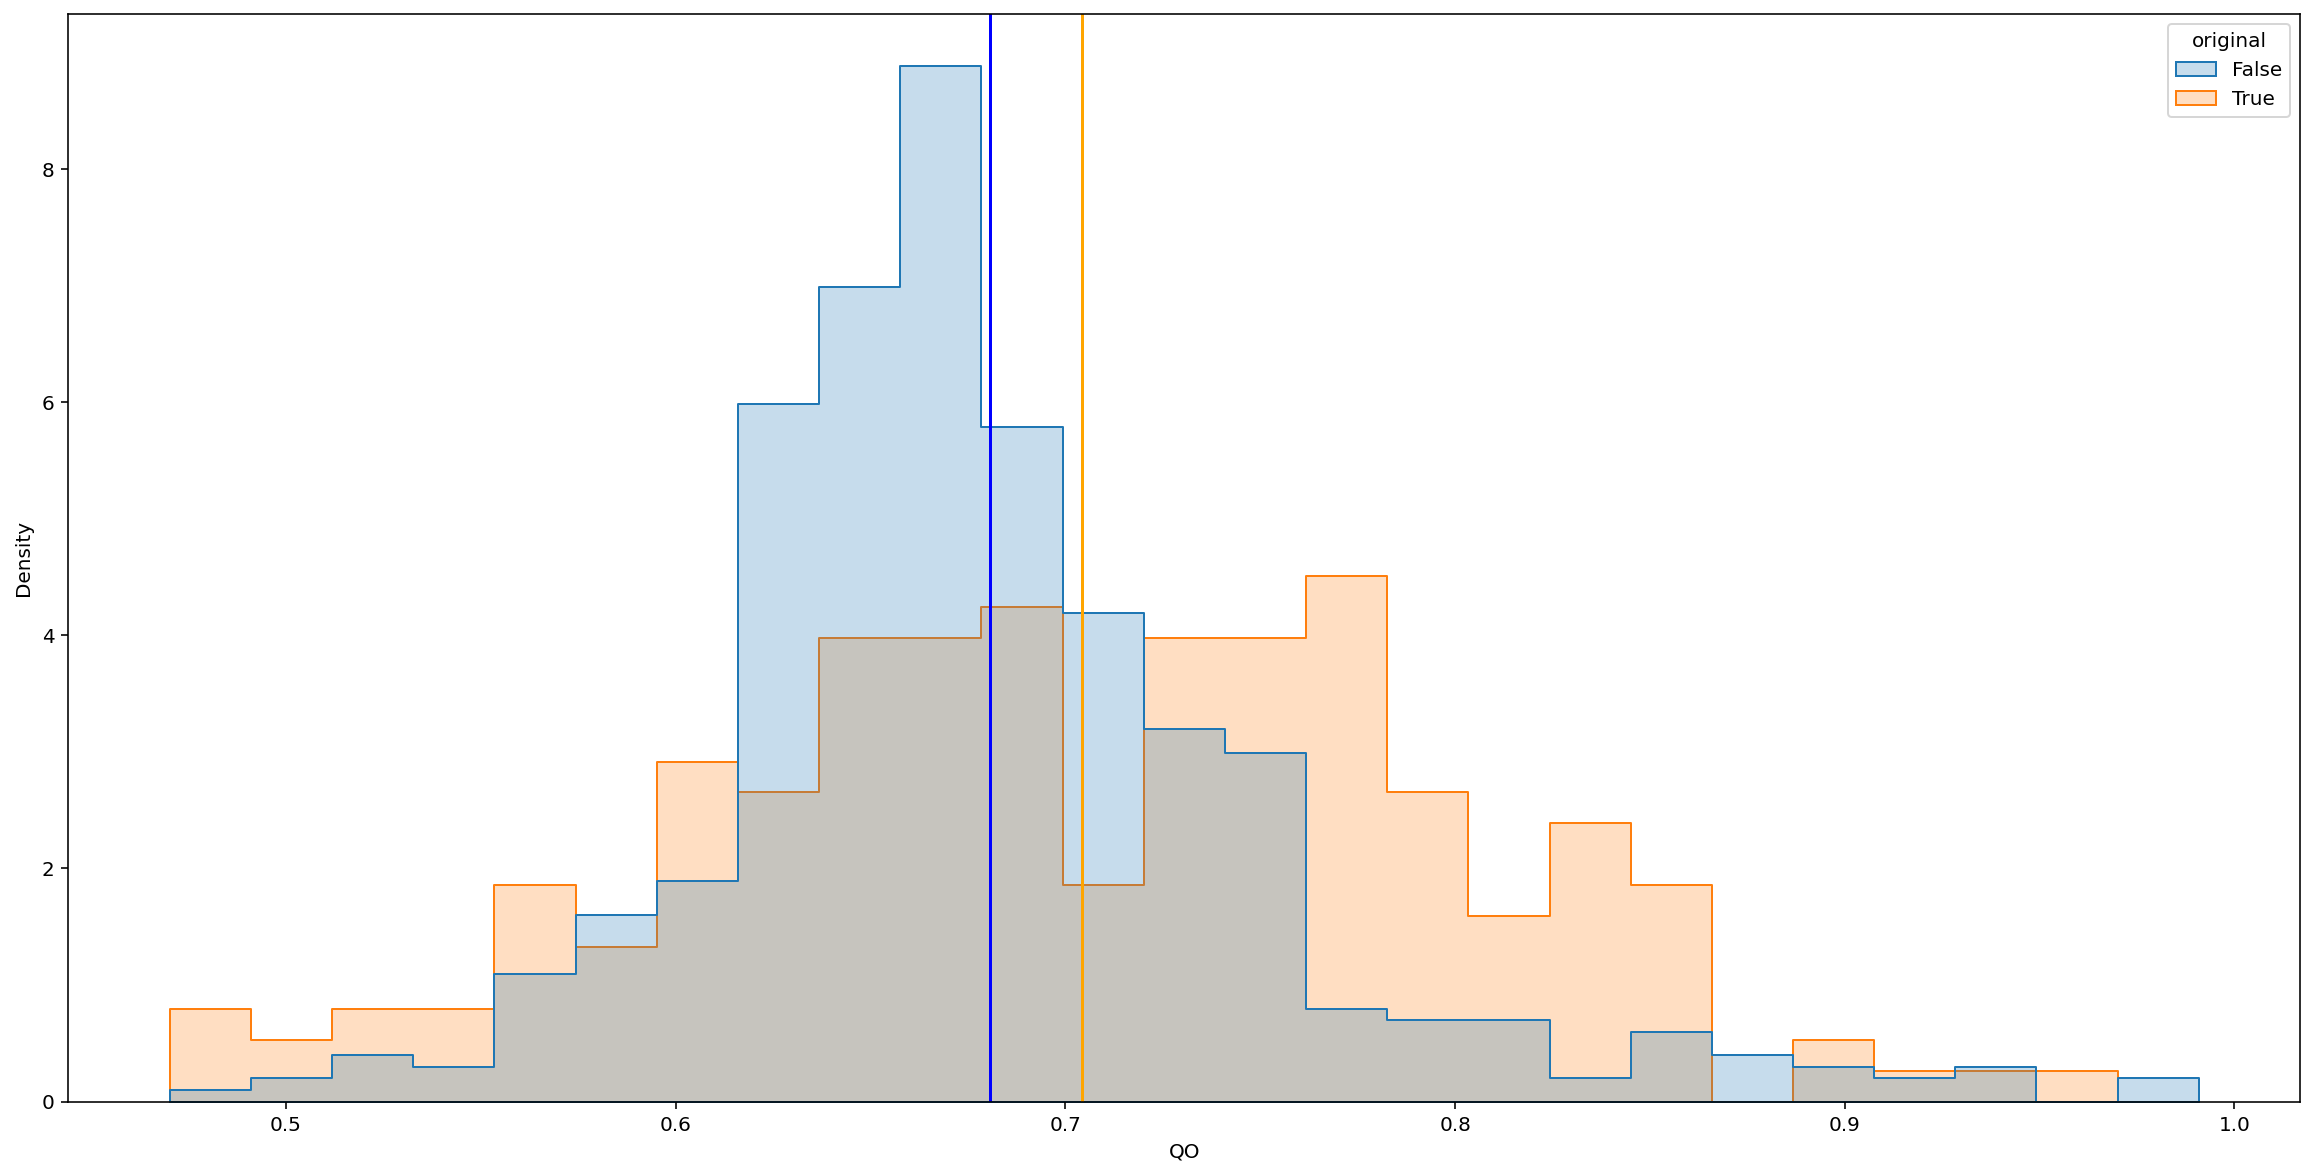

In [85]:
sns.histplot(data=m, x='QO', hue='original', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.original == True].QO.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].QO.mean(),
            color='blue')

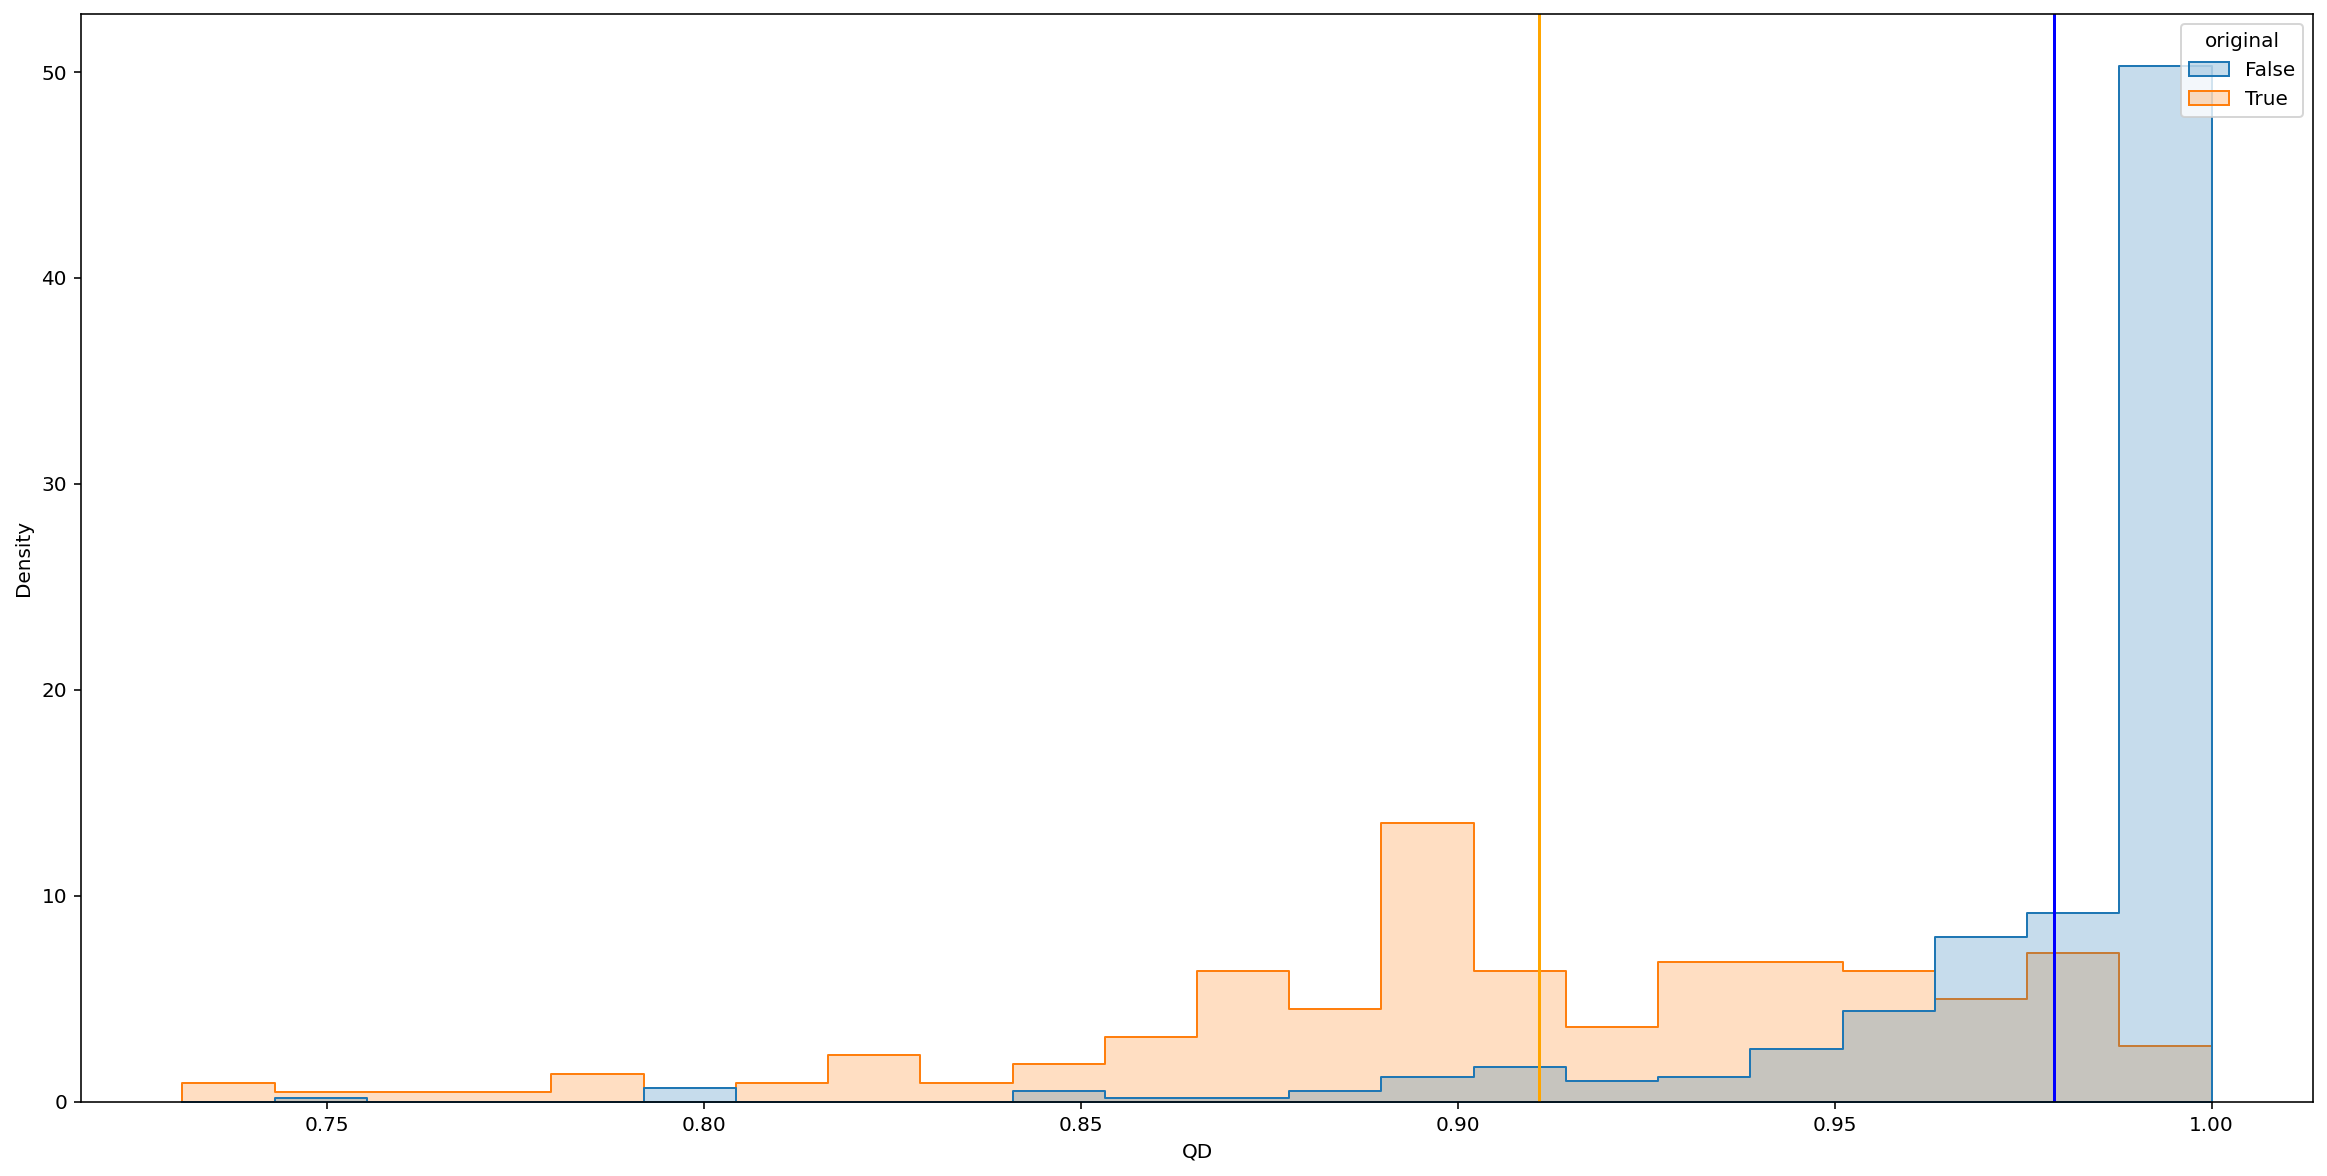

In [74]:
sns.histplot(data=m, x='QD', hue='original', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.original == True].QD.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].QD.mean(),
            color='blue')

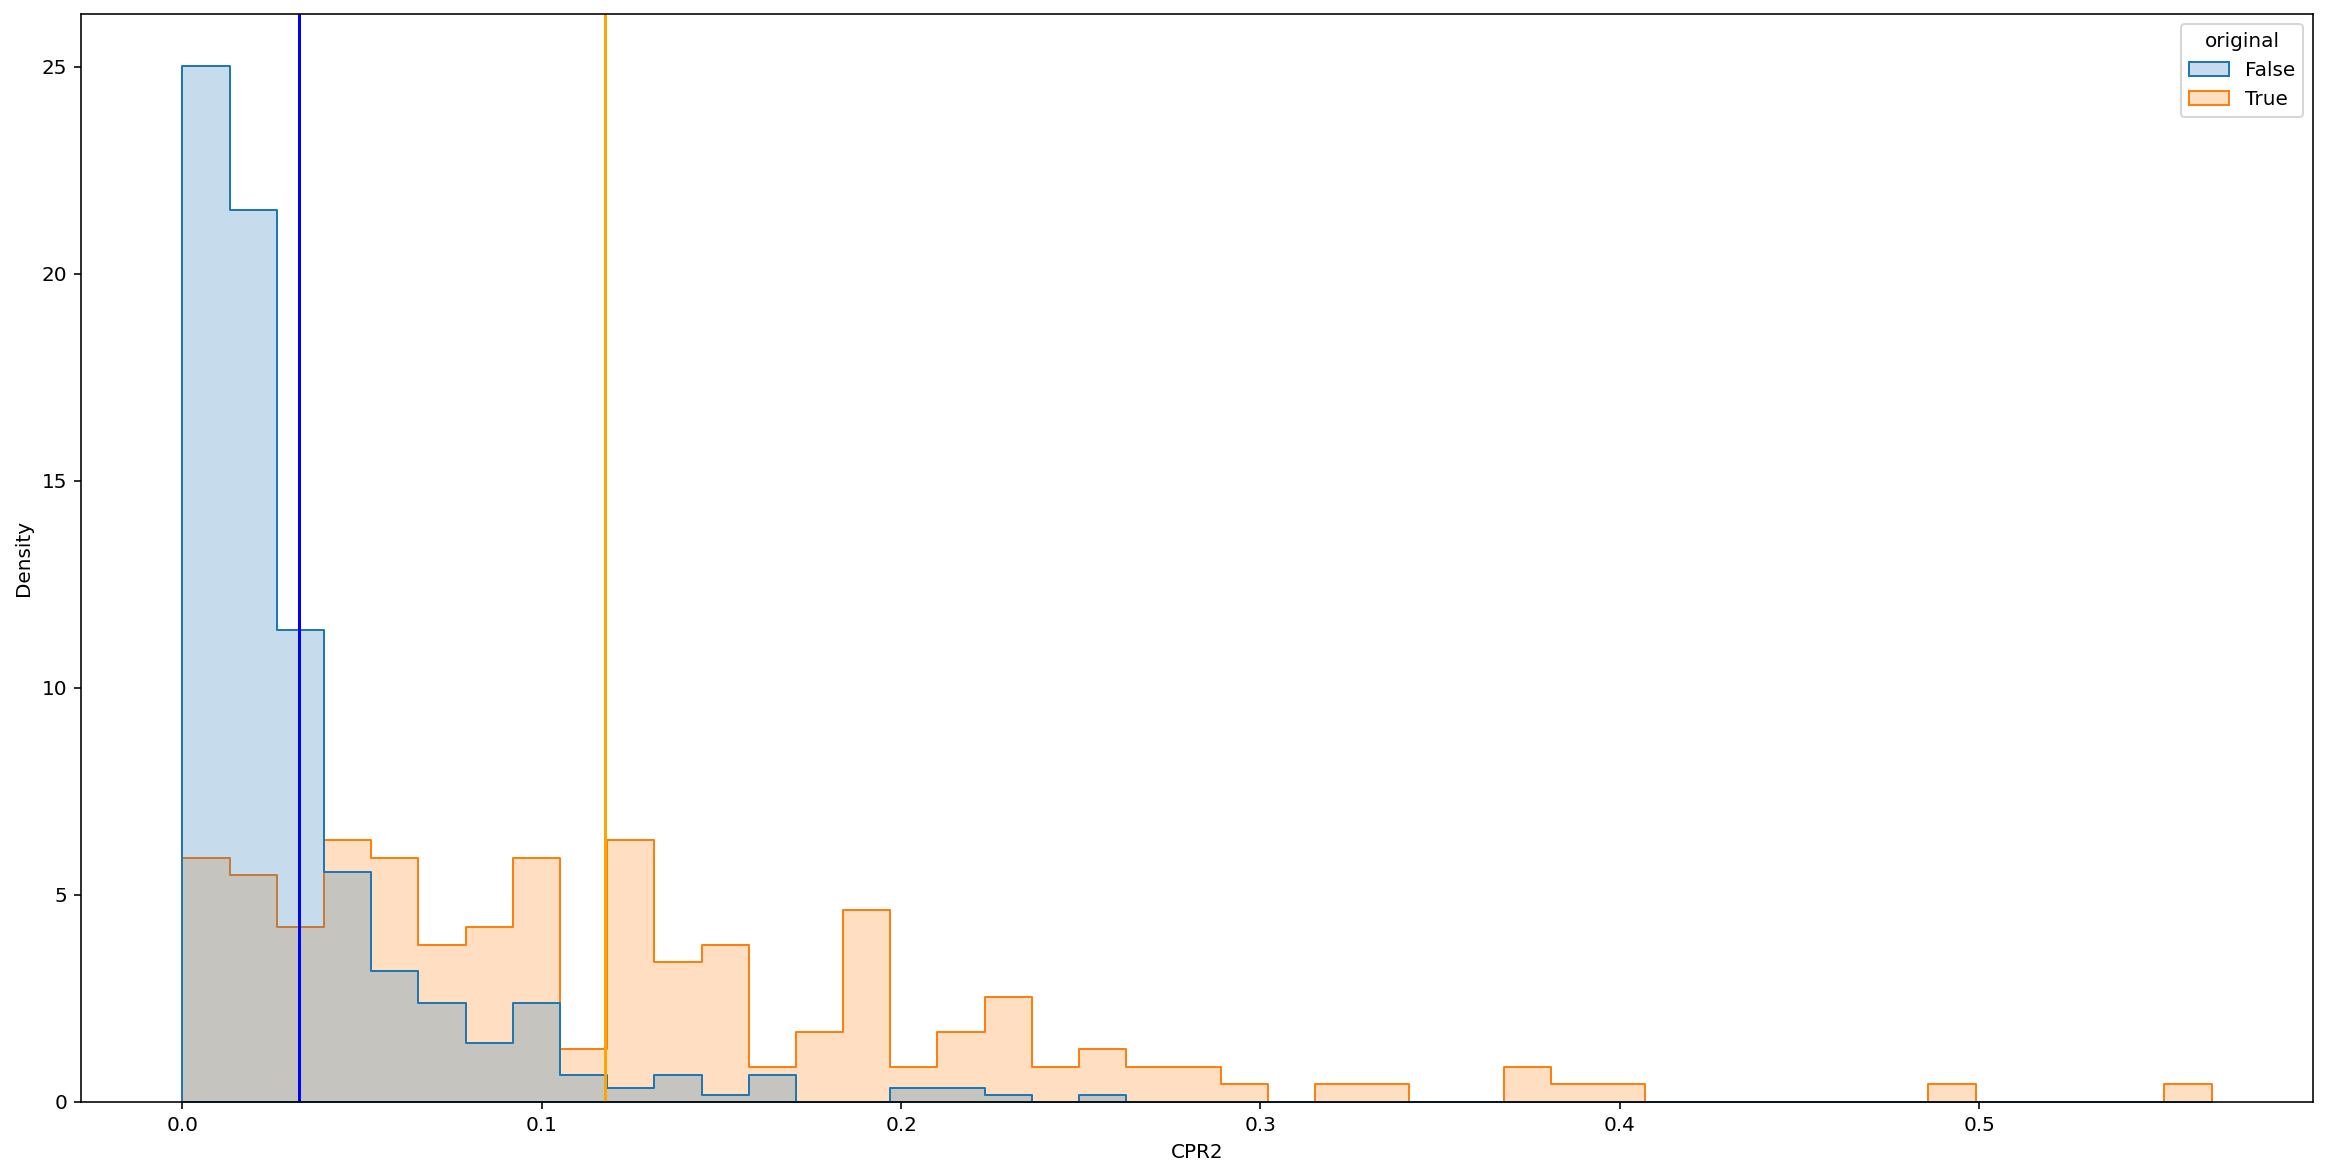

In [76]:
sns.histplot(data=m, x='CPR2', hue='original', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.original == True].CPR2.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].CPR2.mean(),
            color='blue')

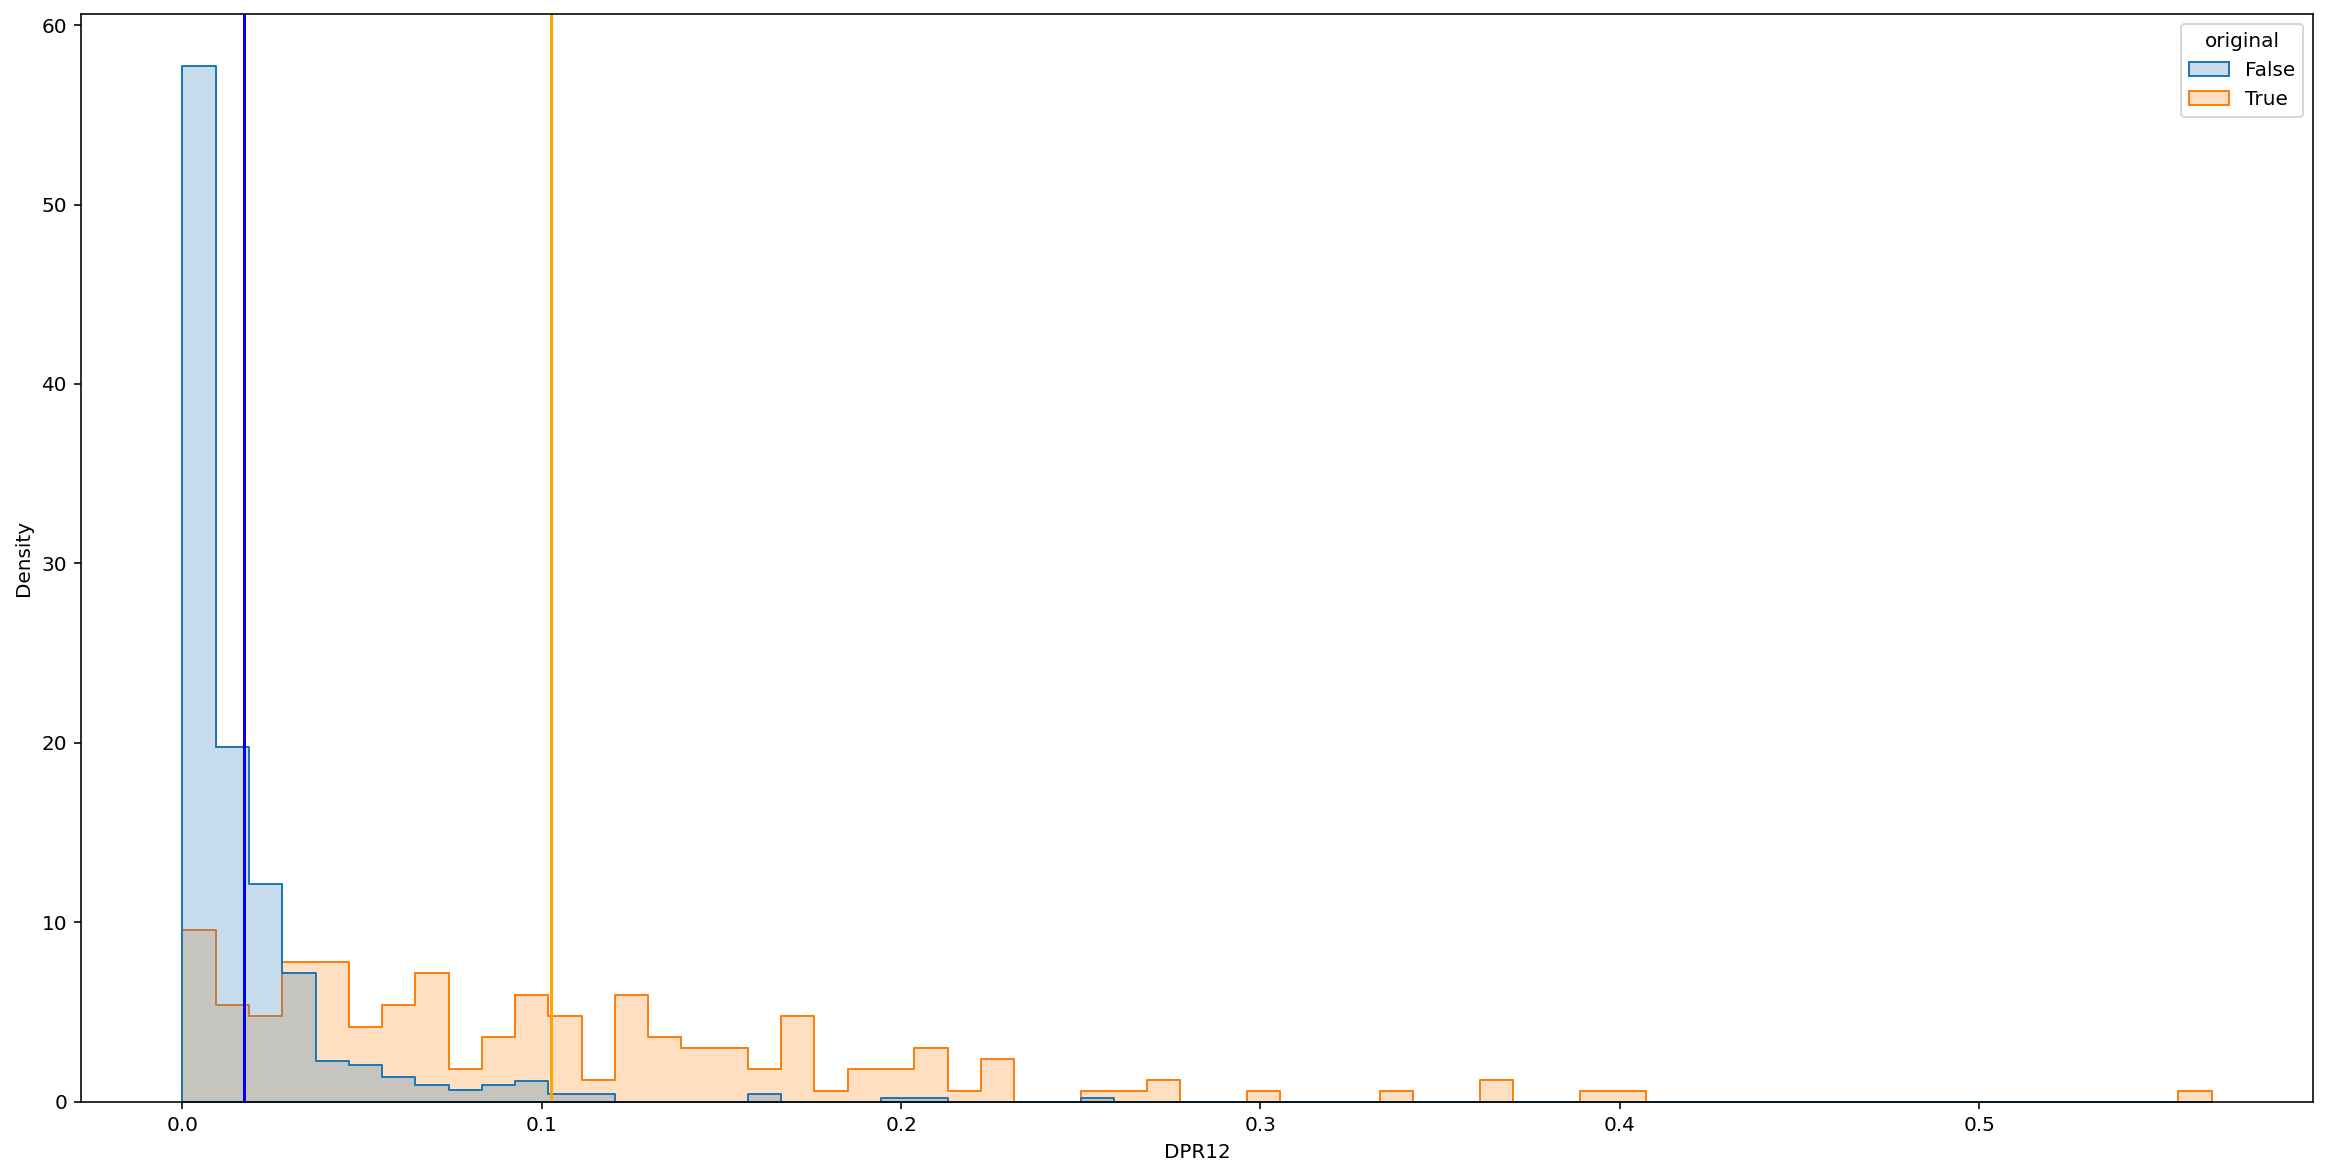

In [79]:
sns.histplot(data=m, x='DPR12', hue='original', element="step", 
             stat="density", common_norm=False)
plt.axvline(x=m[m.original == True].DPR12.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].DPR12.mean(),
            color='blue')

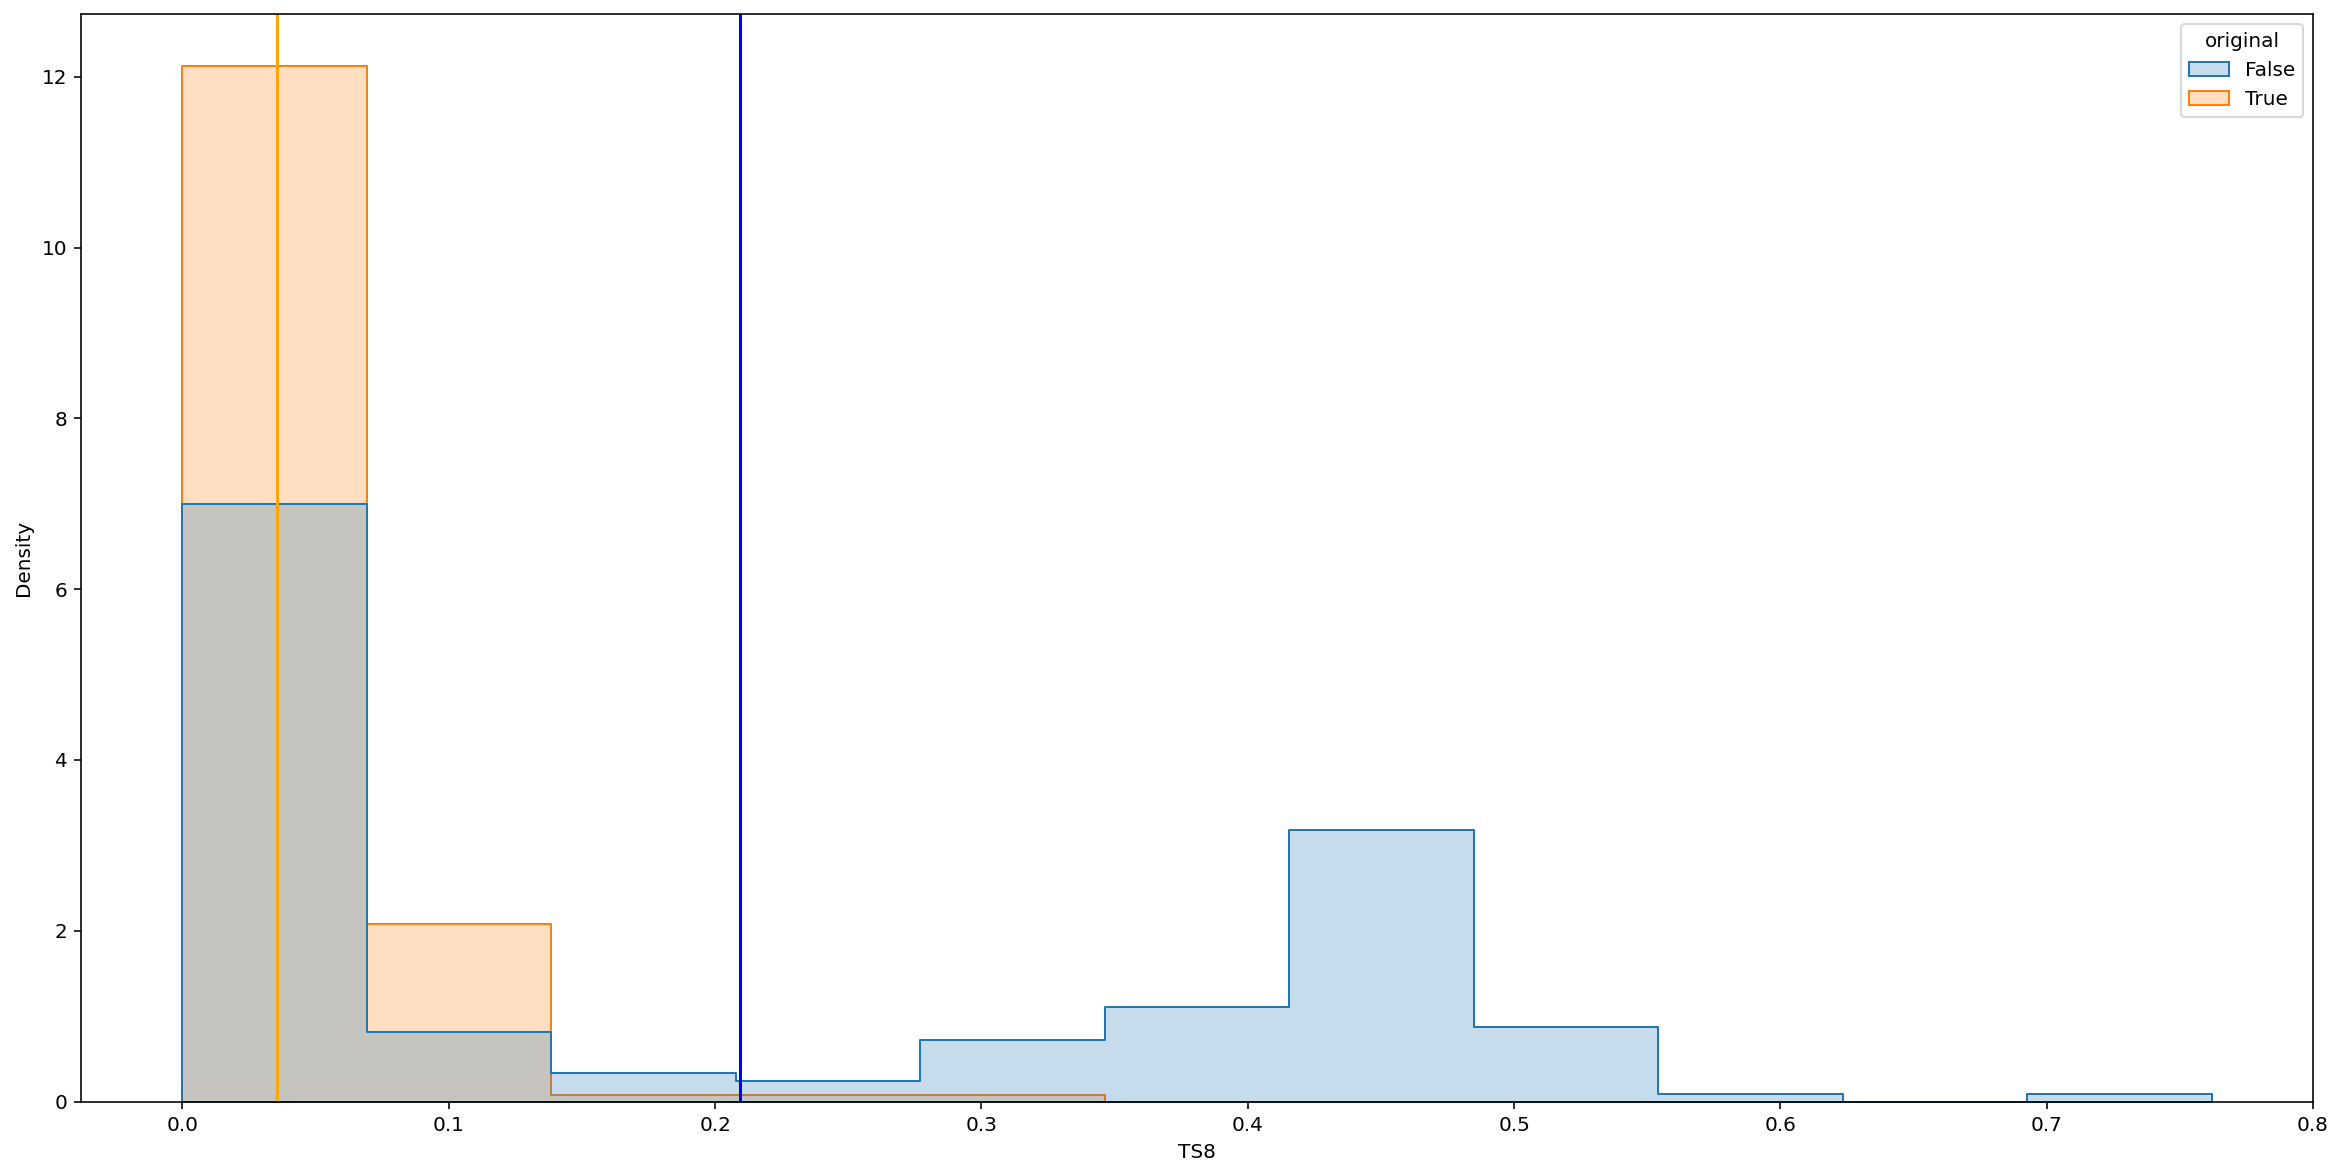

In [8]:
sns.histplot(data=m, x='TS8', hue='original', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.original == True].TS8.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].TS8.mean(),
            color='blue')

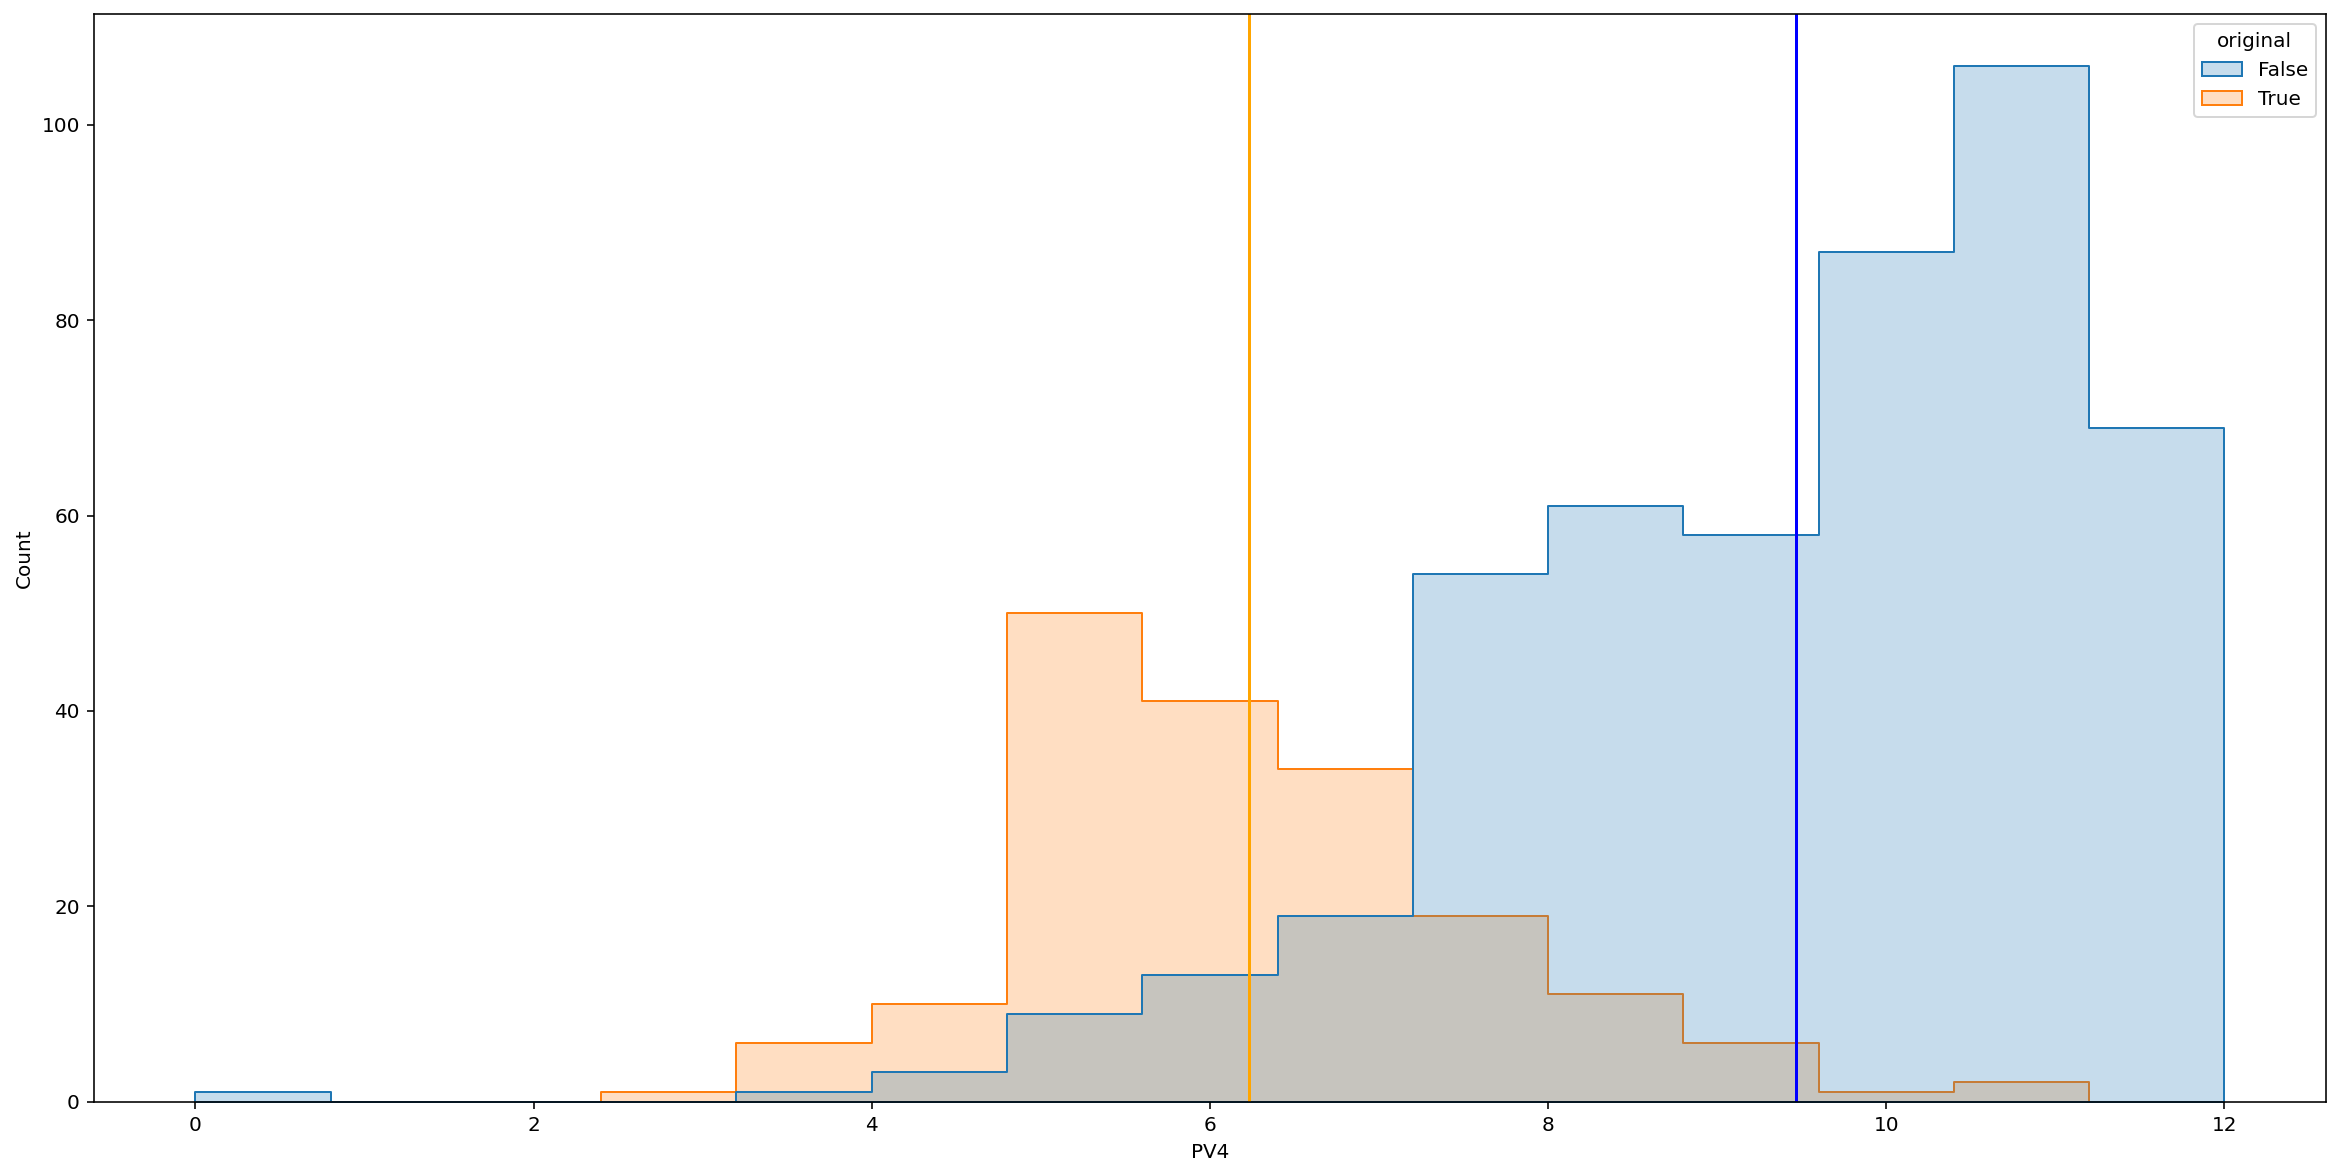

In [7]:
sns.histplot(data=m, x='PV4', hue='original', element="step")
plt.axvline(x=m[m.original == True].PV4.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].PV4.mean(),
            color='blue')

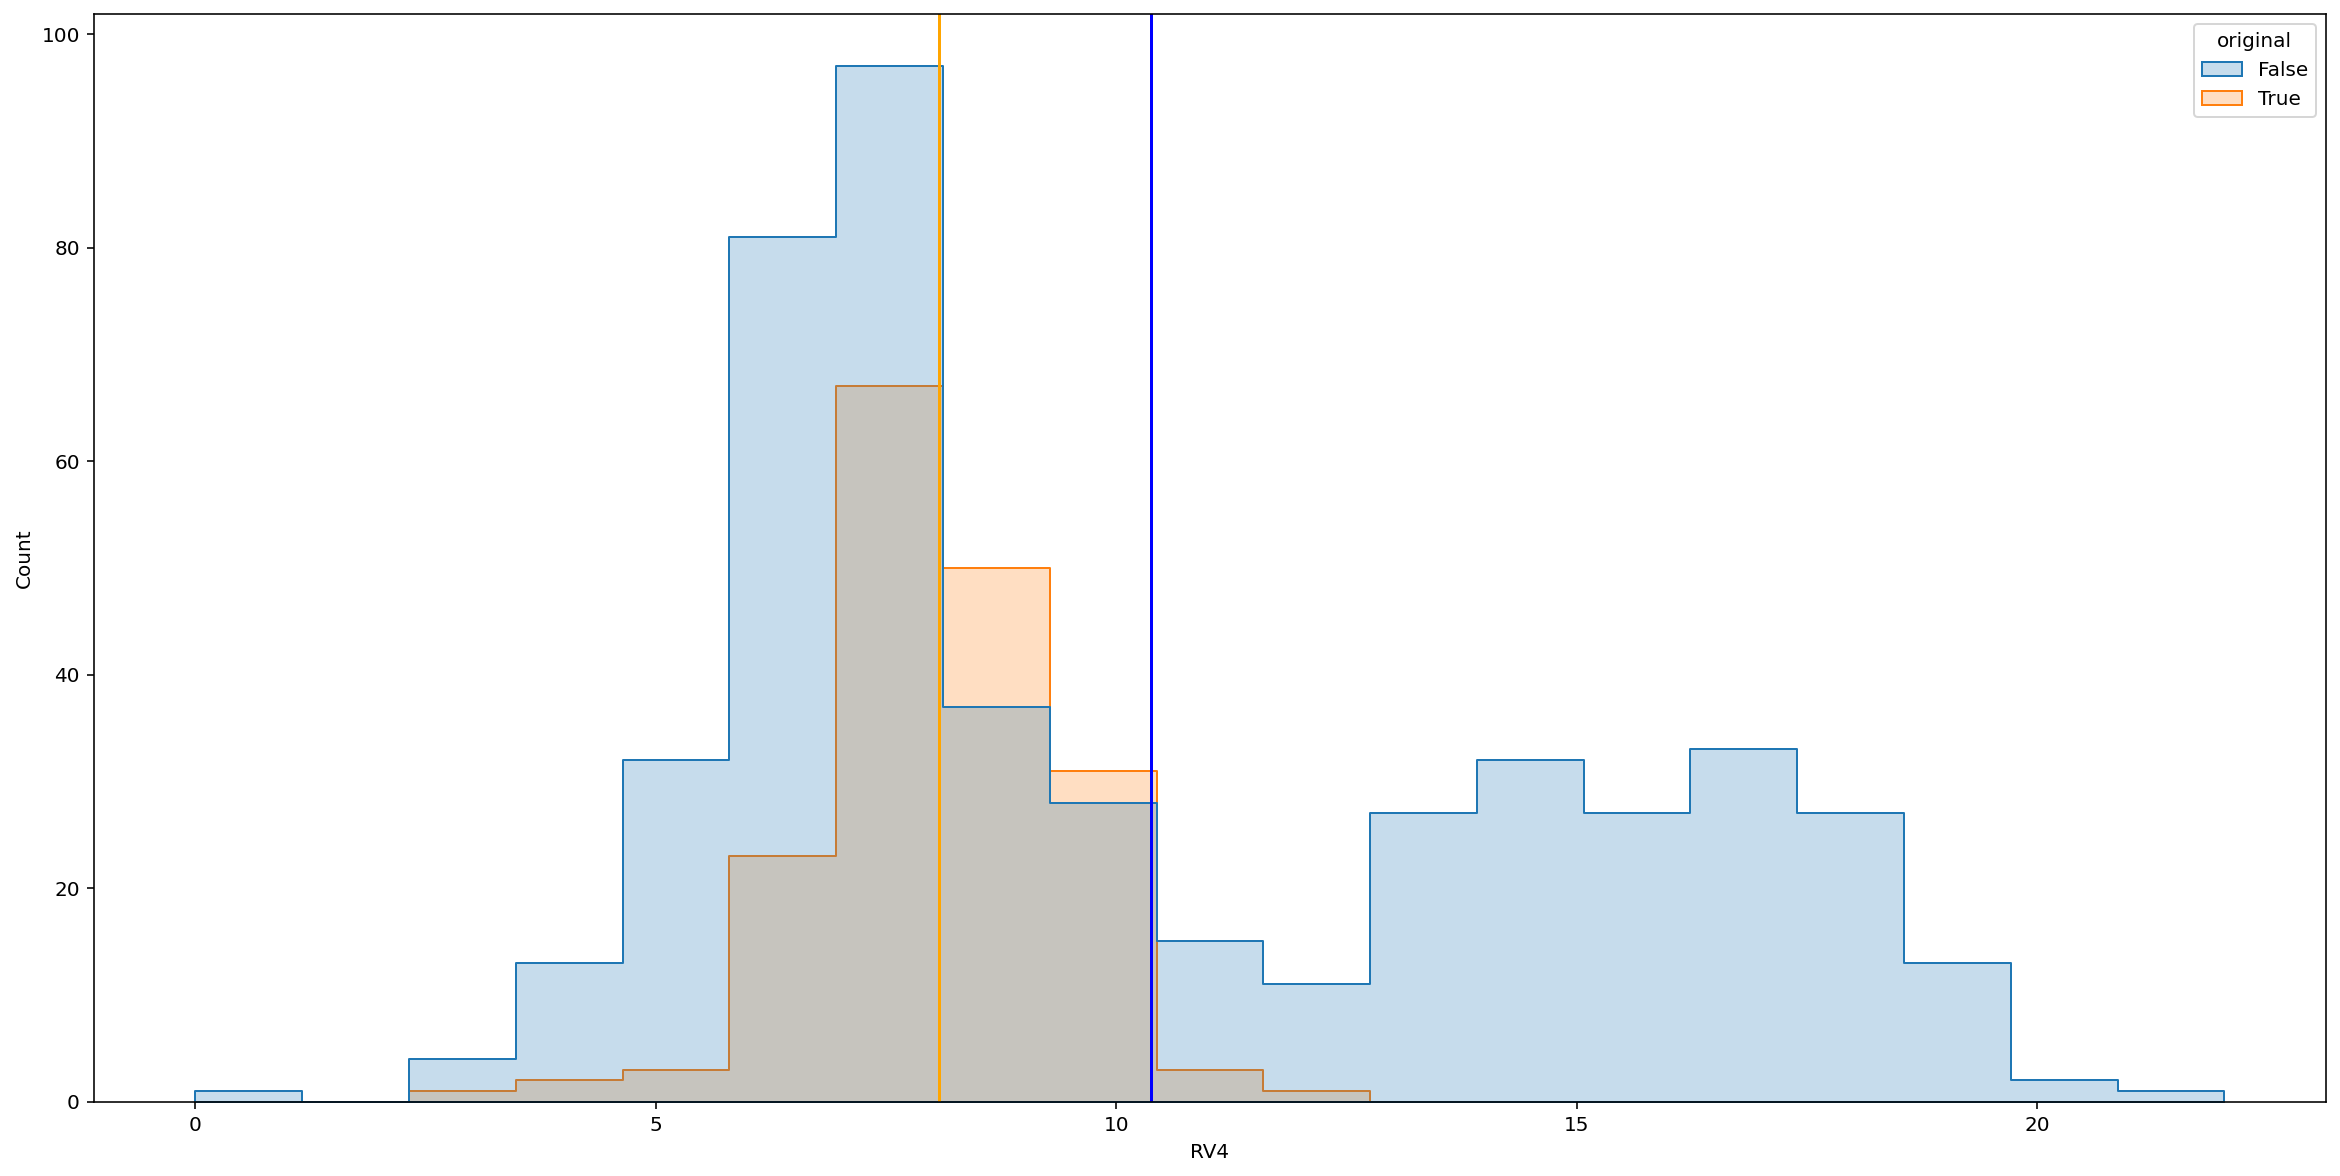

In [8]:
sns.histplot(data=m, x='RV4', hue='original', element="step")
plt.axvline(x=m[m.original == True].RV4.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].RV4.mean(),
            color='blue')

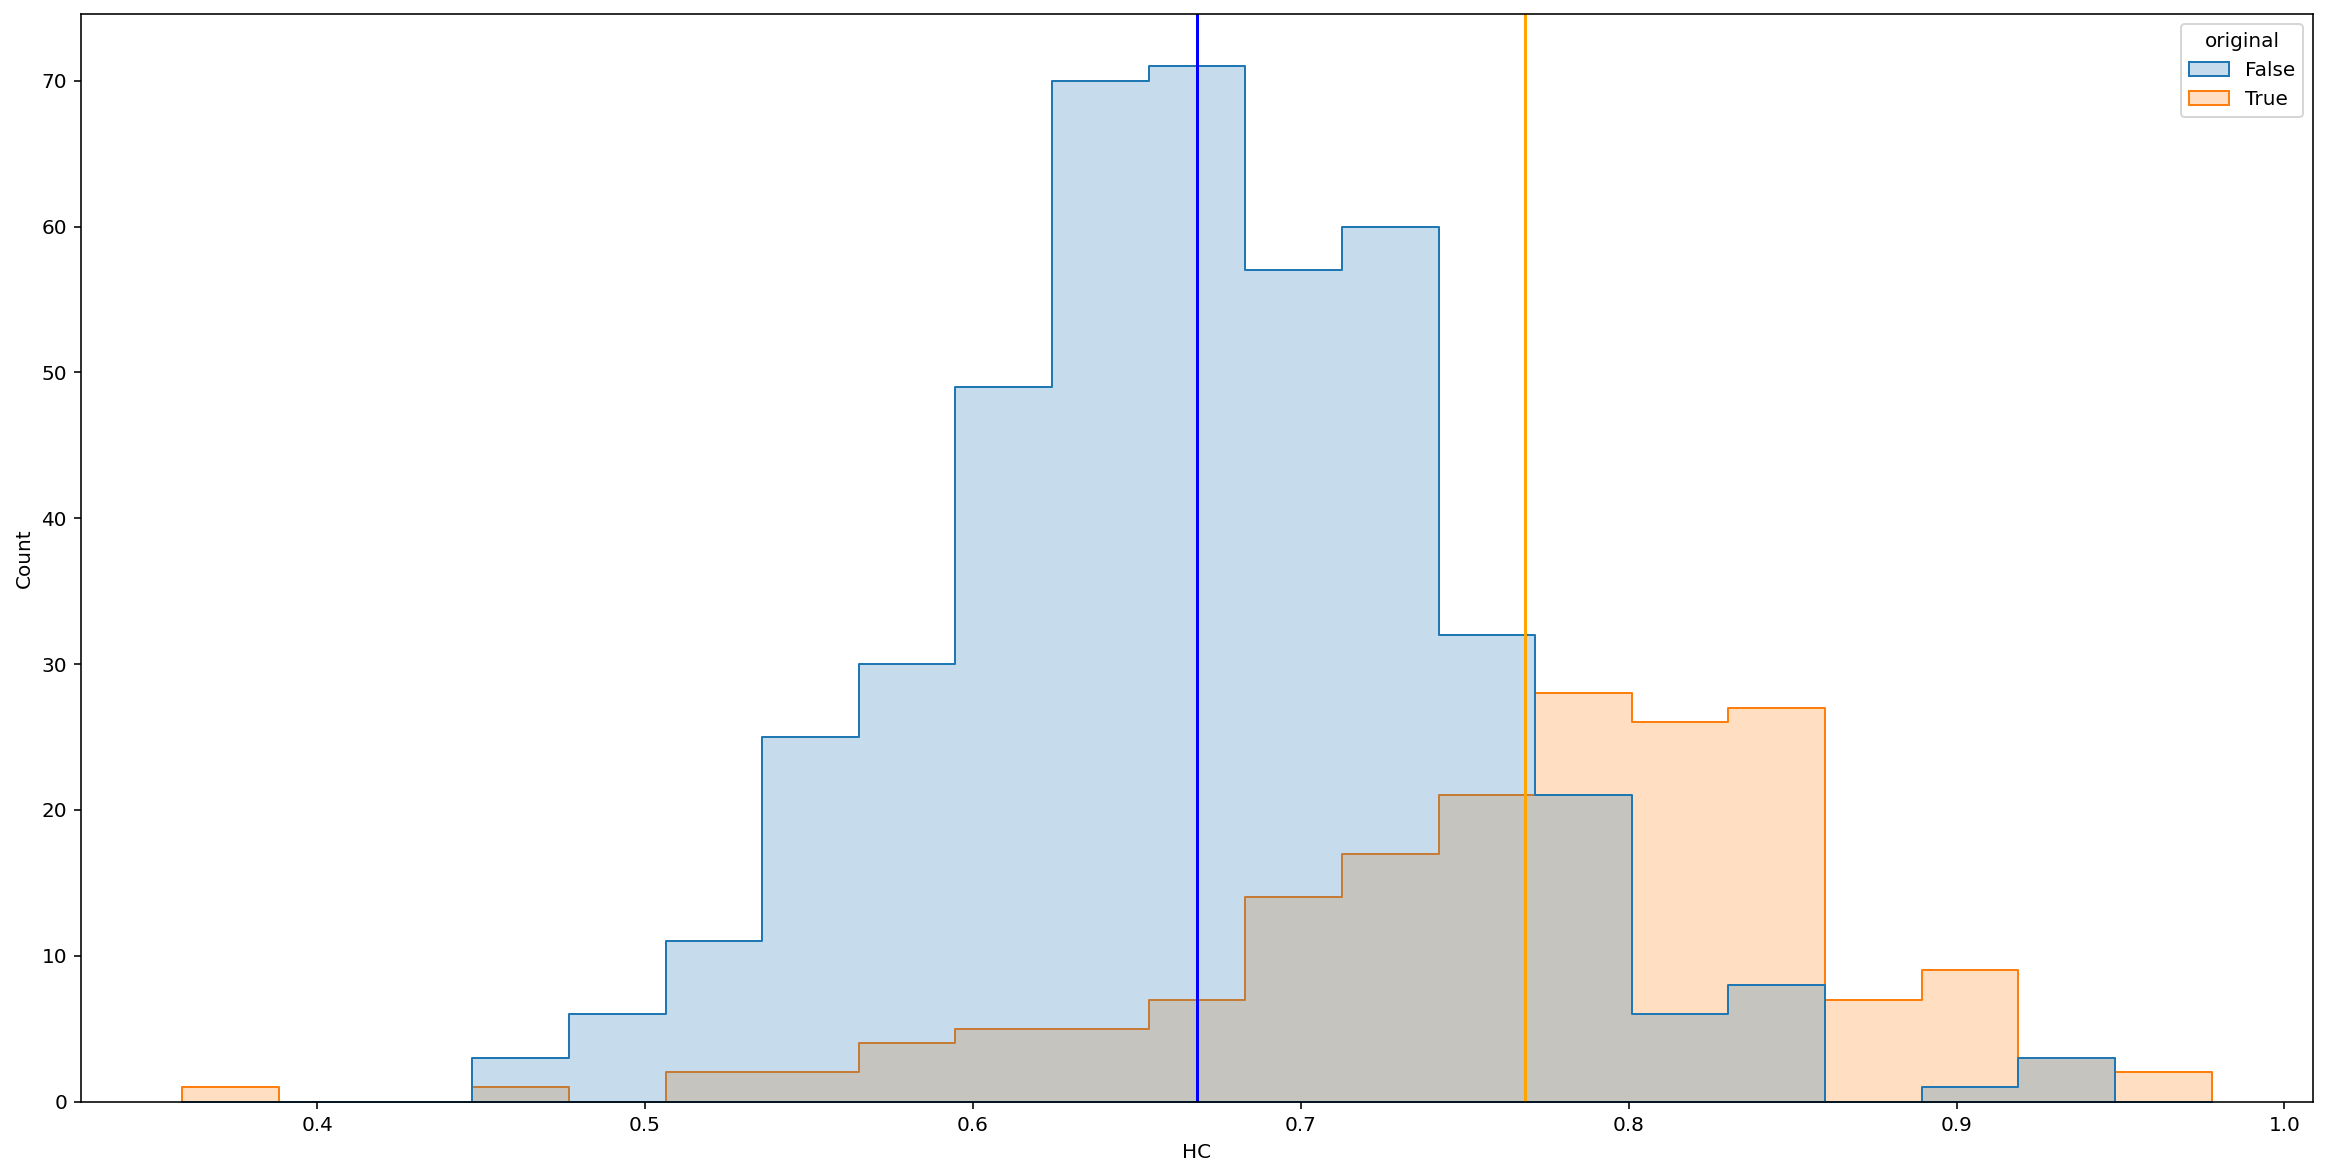

In [52]:
sns.histplot(data=m, x='HC', hue='original', element="step")
plt.axvline(x=m[m.original == True].HC.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].HC.mean(),
            color='blue')

In [50]:
m.HC.value_counts()

0.743563    3
0.610357    2
0.692467    2
0.688078    2
0.652890    2
           ..
0.627639    1
0.617104    1
0.620094    1
0.693594    1
0.685875    1
Name: HC, Length: 613, dtype: int64

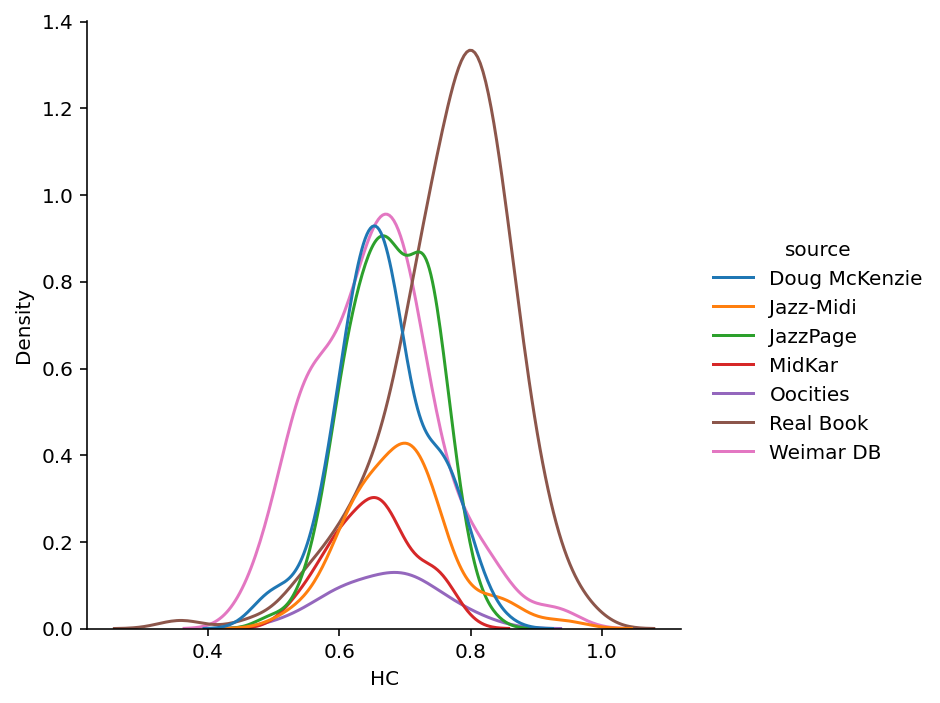

In [33]:
rcParams['figure.figsize'] = 200,100

sns.displot(data=m, x='HC', kind='kde', hue='source')

In [51]:
def get_linear_cp(cp):

    linear_chord_progression = []

    for section in cp['sections']:
        linear_chord_progression += cp['progression'][section]
    
    return objective_metrics.compute_piece_chord_progression_irregularity(
        linear_chord_progression
    )


cp_irr = [{k: get_linear_cp(v)} for k,v in chord_progressions.items()]

In [62]:
all_cp_irr = [list(x.values())[0] for x in cp_irr]

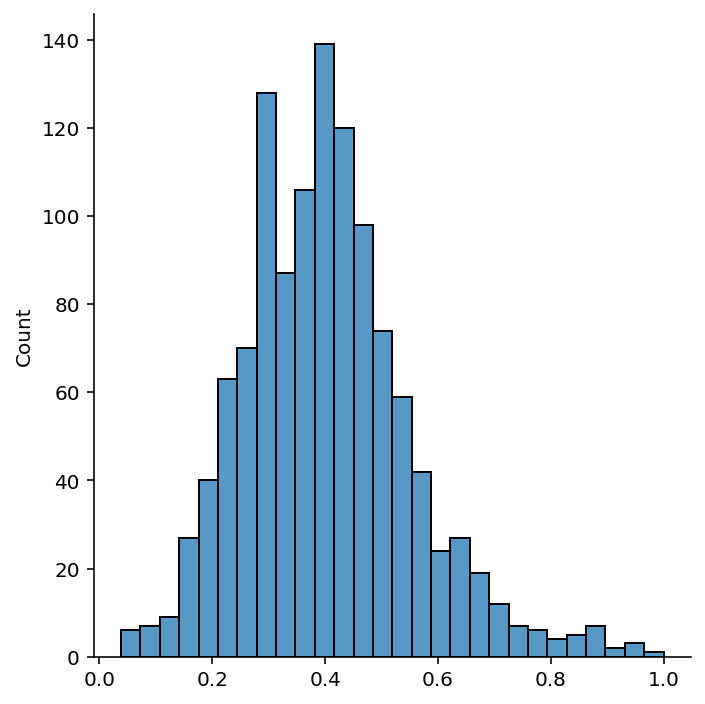

In [63]:
sns.displot(all_cp_irr)